In [1]:
pwd

'/home/manas/Desktop/PROJECTS/IMAGE_CAPTIONING/RUNNING_MODELS/MODEL-QDOG'

In [1]:
# !pip install tensorflow
import numpy as np
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.inception_v3 import InceptionV3, preprocess_input
import matplotlib.pyplot as plt
import pickle

MODEL_PATH = './image-caption-30k-39.h5'  
WORDTOIX_PATH = './wordtoix.pkl'  
IXTOWORD_PATH = './ixtoword.pkl' 
MAX_LENGTH = 74  

model = load_model(MODEL_PATH)

with open(WORDTOIX_PATH, 'rb') as f:
    wordtoix = pickle.load(f)

with open(IXTOWORD_PATH, 'rb') as f:
    ixtoword = pickle.load(f)

inception_model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')

def preprocess_img(img_path):
    img = load_img(img_path, target_size=(299, 299))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

def extract_features(photo):
    feature_vector = inception_model.predict(photo)
    return np.reshape(feature_vector, (1, feature_vector.shape[1]))

def greedy_search(features):
    start_seq = 'startseq'
    for i in range(MAX_LENGTH):
        seq = [wordtoix[word] for word in start_seq.split() if word in wordtoix]
        seq = pad_sequences([seq], maxlen=MAX_LENGTH)
        yhat = model.predict([features, seq], verbose=0)
        yhat = np.argmax(yhat)
        word = ixtoword[yhat]
        start_seq += ' ' + word
        if word == 'endseq':
            break
    return ' '.join(start_seq.split()[1:-1])

def test_image(image_path):
    photo = preprocess_img(image_path)
    features = extract_features(photo)
    caption = greedy_search(features)
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    print("Generated Caption: ", caption)


2024-10-04 02:07:07.730624: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-04 02:07:07.760600: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-04 02:07:07.769720: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-04 02:07:07.791452: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-04 02:07:09.621862: W tensorflow/compiler/tf2

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


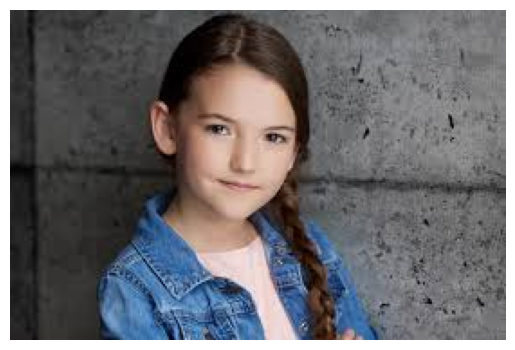

Generated Caption:  woman in red shirt is standing in front of wall with graffiti on it


In [2]:

IMAGE_PATH = '../test_images/download (8).jpeg'  
test_image(IMAGE_PATH)